Third Task

By central limit theorem we know that $S_n \to N(0,\sqrt{n})$, therefore $\mathbb{E}(|S_n|) \sim \mathbb{E}(|N(0,\sqrt{n})|) = \sqrt{\frac{2n}{\pi}}$.

Taking $\log$ in both sides we conclude that

$\log(\mathbb{E}|S_n|) \sim \log(\sqrt{\frac{2n}{\pi}}) $.

To plot we choose bins of size $n = 2^k$ and plot $\log(\mathbb{E}|S_n|) $ as a function of $k$, so we expect that this function be similar to a line

$\log(\mathbb{E}|S_n|)  \sim \frac{1}{2}\log(2)*k + \log(\sqrt{\frac{2}{\pi}})$.

The objective of the followings simulations is to estimate this coeficient $\frac{1}{2}$ called "difusion coeficient" numerically. In the first task we did that by calculating the mean and median of samples. Now in the Third task we will study the convergence of quantiles.

 ---- diffusion constant is approximally 0.5233351189912514 using quantile 0.15 ----
 ---- diffusion constant is approximally 0.5350894491731518 using quantile 0.35 ----
 ---- diffusion constant is approximally 0.43702100212641026 using median ----
 ---- diffusion constant is approximally 0.5042687956997817 using quantile 0.65 ----
 ---- diffusion constant is approximally 0.5154603604646534 using quantile 0.85 ----
 ---- diffusion constant is approximally 0.4978394891194324 using mean ----
                              --------------                      
 for mean we have a fitting function of y = 0.49784*x + (0.189) + -0.145exp(-0.541*x)


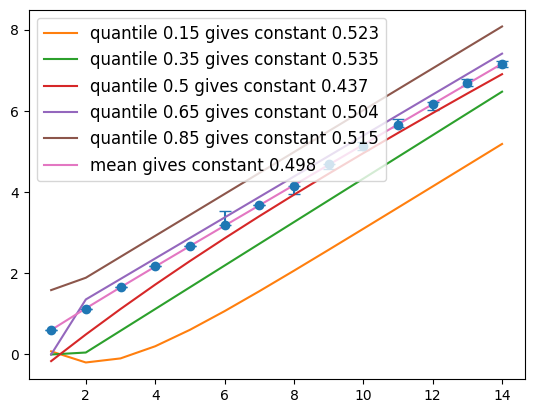

--- 45.98763036727905 seconds ---


In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import numpy as np
from scipy.stats import norm
import statistics 
import time
# for nonlinear regression usinf min squares
from scipy.optimize import least_squares

# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator

start_time = time.time()

seed(1998)
size = 16
numbsimul = 3200
Size = np.linspace(1,size-2, size-2)

A = np.zeros((size - 2,numbsimul -1))

# simulations of random walks
for k in range(2,size):
    n=pow(2,k)

    for j in range(1,numbsimul):
    
        x = 0
    
        for i in range(1,n):
            
            if random()> 0.5:
                x=x+1
            else:
                x=x-1
            
        A[k-2][j-1] = x

# calculating the linear regression of log map
absA = np.abs(A)
sortedAbs = np.sort(absA)
stdA = absA.std(1)
meanA = absA.mean(1)
median = np.quantile(absA, 0.5 , 1)

#quantiles
q1 = np.quantile(absA, 0.15 , 1)
q2 = np.quantile(absA, 0.35 , 1)
q3 = np.quantile(absA, 0.65 , 1)
q4 = np.quantile(absA, 0.85 , 1)

logq1 = np.log(q1)/np.log(2)
logq2 = np.log(q2)/np.log(2)
logq3 = np.log(q3)/np.log(2)
logq4 = np.log(q4)/np.log(2)
logmean = np.log(meanA)/np.log(2)
logmedian = np.log(median)/np.log(2)

#Doing non linear regression fitting to curve f(k) = a*k + b + c exp( -d*k)

def fit_func(param,k):
    return param[0]*k + param[1] + param[2]*np.exp(-param[3]*k )

def cost(param, k , data):
    return fit_func(param,k) - data

param = np.array([1,1,1,1])
p1 = least_squares(cost, param, args=(Size,logq1))
p2 = least_squares(cost, param, args=(Size,logq2))
funcmean = least_squares(cost, param, args=(Size,logmean))
pmedian = least_squares(cost, param, args=(Size,logmedian))
p3 = least_squares(cost, param, args=(Size,logq3))
p4 = least_squares(cost, param, args=(Size,logq4))

# calculating the interval of confidence
alpha = 0.001 # confidence level

lowerboundindex = math.floor(0.5* numbsimul - math.sqrt(0.25*numbsimul)*norm.isf(alpha))
upperboundindex = math.floor(0.5* numbsimul + math.sqrt(0.25*numbsimul)*norm.isf(alpha))
lowerboundindex = [lowerboundindex for i in range(size-2)]
upperboundindex = [upperboundindex for i in range(size-2)]
lowerboundheight = sortedAbs[np.arange(size-2),lowerboundindex]
upperboundheight = sortedAbs[np.arange(size-2),upperboundindex]
loglower = np.log(lowerboundheight)/np.log(2)
logupper = np.log(upperboundheight)/np.log(2)

errorbar = [np.abs(loglower-logmedian), np.abs(logupper-logmedian)]

# printing everything

print(" ---- diffusion constant is approximally %s using quantile 0.15 ----" % p1.x[0])
print(" ---- diffusion constant is approximally %s using quantile 0.35 ----" % p2.x[0])
print(" ---- diffusion constant is approximally %s using median ----" % pmedian.x[0])
print(" ---- diffusion constant is approximally %s using quantile 0.65 ----" % p3.x[0])
print(" ---- diffusion constant is approximally %s using quantile 0.85 ----" % p4.x[0])
print(" ---- diffusion constant is approximally %s using mean ----" % funcmean.x[0])
print("                              --------------                      ")
print(" for mean we have a fitting function of y = {:.5}*x + ({:.3}) + {:.3}exp(-{:.3}*x)".format(funcmean.x[0], funcmean.x[1],funcmean.x[2], funcmean.x[3]))
# ploting graphics
plt.errorbar(Size,logmean,yerr=errorbar, linestyle = 'None',capsize=4, marker = 'o')

def plot_fit_function(p,q):
    plt.plot(Size, fit_func(p.x,Size), label='quantile {:.2} gives constant {:.3}'.format(q,p.x[0]))

plot_fit_function(p1,0.15)
plot_fit_function(p2,0.35)
plot_fit_function(pmedian,0.5)
plot_fit_function(p3,0.65)
plot_fit_function(p4,0.85)
plt.plot(Size, fit_func(funcmean.x,Size), label='mean gives constant {:.3}'.format(funcmean.x[0]))


plt.legend(fontsize=12)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))


Plotting individuals quantiles with meadian and mean for comparasion.

 ---- diffusion constant is approximally 0.43702100212641026 using median ----
 ---- diffusion constant is approximally 0.5233351189912514 using quantile 0.15----
 ---- diffusion constant is approximally 0.4978394891194324 using mean ----
                              --------------                      
 for quantile 0.15 we have a fitting function of y = 0.52334*x + (-2.14) + 3.2exp(-0.634*x)


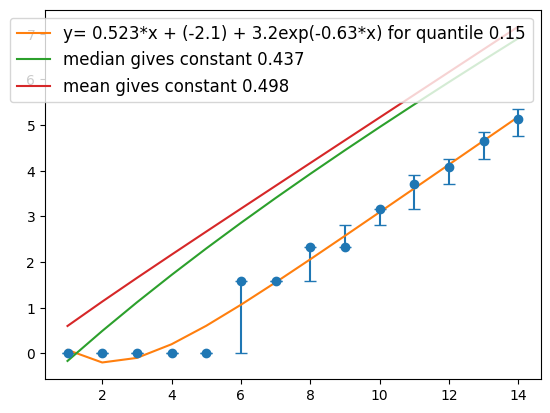

 ---- diffusion constant is approximally 0.43702100212641026 using median ----
 ---- diffusion constant is approximally 0.5350894491731518 using quantile 0.35----
 ---- diffusion constant is approximally 0.4978394891194324 using mean ----
                              --------------                      
 for quantile 0.35 we have a fitting function of y = 0.53509*x + (-1.02) + 3.67e+04exp(-11.2*x)


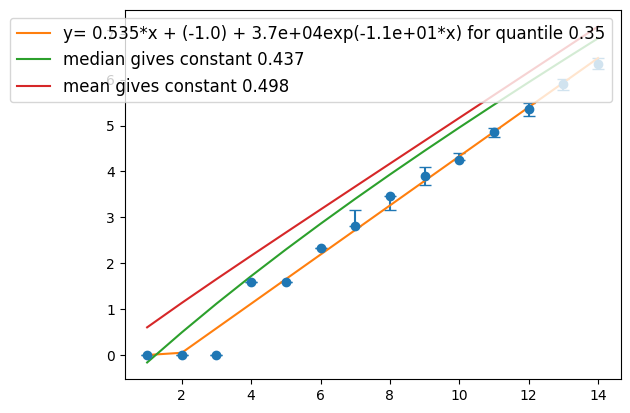

 ---- diffusion constant is approximally 0.43702100212641026 using median ----
 ---- diffusion constant is approximally 0.43702100212641026 using quantile 0.5----
 ---- diffusion constant is approximally 0.4978394891194324 using mean ----
                              --------------                      
 for quantile 0.5 we have a fitting function of y = 0.43702*x + (1.04) + -1.89exp(-0.144*x)


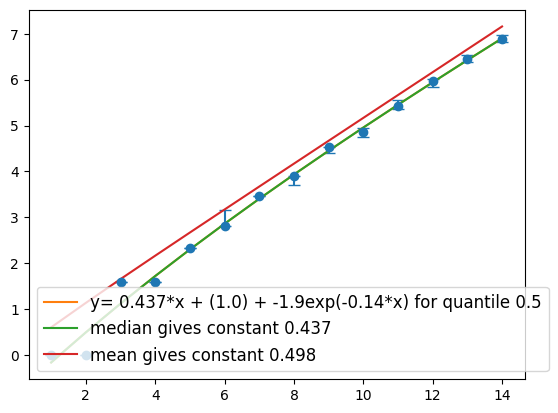

 ---- diffusion constant is approximally 0.43702100212641026 using median ----
 ---- diffusion constant is approximally 0.5042687956997817 using quantile 0.65----
 ---- diffusion constant is approximally 0.4978394891194324 using mean ----
                              --------------                      
 for quantile 0.65 we have a fitting function of y = 0.50427*x + (0.346) + -4.67e+05exp(-13.2*x)


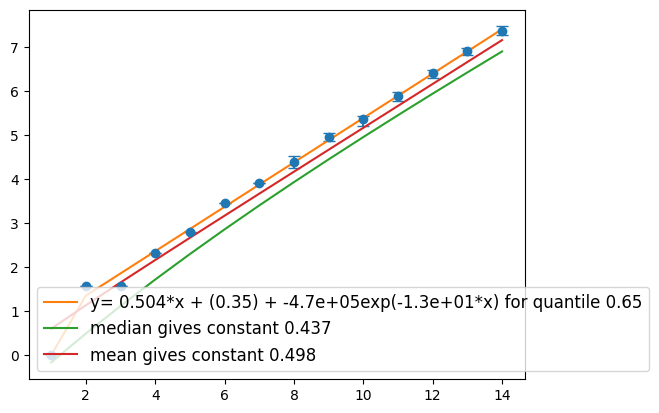

 ---- diffusion constant is approximally 0.43702100212641026 using median ----
 ---- diffusion constant is approximally 0.5154603604646534 using quantile 0.85----
 ---- diffusion constant is approximally 0.4978394891194324 using mean ----
                              --------------                      
 for quantile 0.85 we have a fitting function of y = 0.51546*x + (0.858) + 1.4e+05exp(-13.4*x)


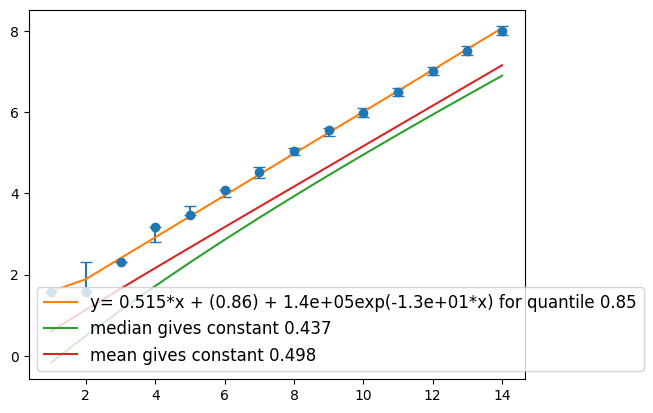

--- 48.79379081726074 seconds ---


In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import numpy as np
from scipy.stats import norm
import statistics 
import time
# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator
start_time = time.time()

seed(1998)
size = 16
numbsimul = 3200
Size = np.linspace(1,size-2, size-2)

A = np.zeros((size - 2,numbsimul -1))

# simulations of random walks
for k in range(2,size):
    n=pow(2,k)

    for j in range(1,numbsimul):
    
        x = 0
    
        for i in range(1,n):
            
            if random()> 0.5:
                x=x+1
            else:
                x=x-1
            
        A[k-2][j-1] = x

# calculating the linear regression of log map
absA = np.abs(A)
sortedAbs = np.sort(absA)
stdA = absA.std(1)
meanA = absA.mean(1)
median = np.quantile(absA, 0.5 , 1)

#quantiles
q15= 0.15
q1 = np.quantile(absA, q15 , 1)

q35=0.35
q2 = np.quantile(absA, q35, 1)

q65 = 0.65
q3 = np.quantile(absA, q65,1)

q85 = 0.85
q4 = np.quantile(absA, q85 , 1)

logq1 = np.log(q1)/np.log(2)
logq2 = np.log(q2)/np.log(2)
logq3 = np.log(q3)/np.log(2)
logq4 = np.log(q4)/np.log(2)

logmean = np.log(meanA)/np.log(2)
logmedian = np.log(median)/np.log(2)

#Doing non linear regression fitting to curve f(k) = a*k + b + c exp( -d*k)

def fit_func(param,k):
    return param[0]*k + param[1] + param[2]*np.exp(-param[3]*k )

def cost(param, k , data):
    return fit_func(param,k) - data

param = np.array([1,1,1,1])
p1 = least_squares(cost, param, args=(Size,logq1))
p2 = least_squares(cost, param, args=(Size,logq2))
funcmean = least_squares(cost, param, args=(Size,logmean))
pmedian = least_squares(cost, param, args=(Size,logmedian))
p3 = least_squares(cost, param, args=(Size,logq3))
p4 = least_squares(cost, param, args=(Size,logq4))


# calculating the interval of confidence
alpha = 0.001 # confidence level
def confidenceinterval(q, logq):
    lowerboundindex = math.floor(q* numbsimul - math.sqrt(0.25*numbsimul)*norm.isf(alpha))
    upperboundindex = math.floor(q* numbsimul + math.sqrt(0.25*numbsimul)*norm.isf(alpha))
    lowerboundindex = [lowerboundindex for i in range(size-2)]
    upperboundindex = [upperboundindex for i in range(size-2)]
    lowerboundheight = sortedAbs[np.arange(size-2),lowerboundindex]
    upperboundheight = sortedAbs[np.arange(size-2),upperboundindex]
    loglower = np.log(lowerboundheight)/np.log(2)
    logupper = np.log(upperboundheight)/np.log(2)

    interval = [np.abs(loglower-logq), np.abs(logupper-logq)]
    return interval



    # printing quantile q 
def printquantile(q,logq, param):
    interval = confidenceinterval(q,logq)

    print(" ---- diffusion constant is approximally %s using median ----" % pmedian.x[0])
    print(" ---- diffusion constant is approximally {} using quantile {}----"  .format(param.x[0], q))
    print(" ---- diffusion constant is approximally %s using mean ----" % funcmean.x[0])
    print("                              --------------                      ")
    print(" for quantile {:.2} we have a fitting function of y = {:.5}*x + ({:.3}) + {:.3}exp(-{:.3}*x)".format(q,param.x[0], param.x[1],param.x[2], param.x[3]))

    # ploting graphics
    plt.errorbar(Size,logq,yerr=interval, linestyle = 'None',capsize=4, marker = 'o')
    plt.plot(Size, fit_func(param.x,Size), label='y= {:.3}*x + ({:.2}) + {:.2}exp(-{:.2}*x) for quantile {:.2}'.format(param.x[0], param.x[1],param.x[2], param.x[3],q))

    plt.plot(Size, fit_func(pmedian.x,Size), label='median gives constant {:.3}'.format(pmedian.x[0]))

    plt.plot(Size, fit_func(funcmean.x,Size), label='mean gives constant {:.3}'.format(funcmean.x[0]))

    plt.legend(fontsize=12)
    plt.show()

printquantile(q15, logq1, p1)
printquantile(q35, logq2, p2)
printquantile(0.5, logmedian, pmedian)
printquantile(q65, logq3, p3)
printquantile(q85, logq4, p4)

print("--- %s seconds ---" % (time.time() - start_time))